<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [24]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import squarify
import pandas as pd
import numpy as np
import spacy
from collections import Counter

# from bs4 import BeautifulSoup
nlp = spacy.load('en_core_web_lg')

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [4]:
df = pd.read_csv('./data/job_listings.csv')

In [9]:
from bs4 import BeautifulSoup
import requests

def clean_description(description):
    
    soup = BeautifulSoup(description)
    
    return soup.get_text()

df['clean_description'] = df['description'].apply(clean_description)

df.head()

,Unnamed: 0,description,title,clean_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


## 2) Use Spacy to tokenize the listings 

In [18]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) & (token.is_punct != True)]

In [19]:
df['token_description'] = df['description'].apply(tokenize)

df.head()

,Unnamed: 0,description,title,clean_description,token_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...","[b""<div><div, >, job, requirements:</div><ul><..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'<div, >, job, description, <, br/>\n, <, br..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'<div><p, >, Data, scientist, work, consult,..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'<div, class=""jobsearch, JobMetadataHeader, ..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'<ul><li, >, location, USA, \xe2\x80\x93, mu..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [20]:
vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(df['clean_description'])

# Get sparse dtm
dtm = vect.transform(df['clean_description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [22]:
dtm.head()

,000,10,100,2019,40,abilities,ability,able,academic,access,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [36]:
vect.get_feature_names()

['000',
 '10',
 '100',
 '2019',
 '40',
 'abilities',
 'ability',
 'able',
 'academic',
 'access',
 'accommodation',
 'accuracy',
 'achieve',
 'acquisition',
 'action',
 'actionable',
 'activities',
 'ad',
 'addition',
 'additional',
 'address',
 'ads',
 'advance',
 'advanced',
 'advertising',
 'affirmative',
 'age',
 'agency',
 'agile',
 'ai',
 'algorithm',
 'algorithms',
 'amazon',
 'americas',
 'amounts',
 'analyses',
 'analysis',
 'analyst',
 'analysts',
 'analytic',
 'analytical',
 'analytics',
 'analyze',
 'analyzing',
 'ancestry',
 'answer',
 'app',
 'applicable',
 'applicants',
 'application',
 'applications',
 'applied',
 'applies',
 'apply',
 'applying',
 'approach',
 'approaches',
 'appropriate',
 'architecture',
 'area',
 'areas',
 'art',
 'artificial',
 'aspects',
 'assets',
 'assigned',
 'assist',
 'assistance',
 'attention',
 'audience',
 'audiences',
 'autodesk',
 'automated',
 'automation',
 'available',
 'aws',
 'azure',
 'bachelor',
 'background',
 'backgrounds',
 'ba

In [25]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['token_description'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('<', 6276),
 ('>', 5980),
 ('datum', 2646),
 ('li', 2083),
 ('work', 1490),
 ('experience', 1446),
 ('team', 1177),
 ('business', 1103),
 ('data', 816),
 ('Data', 801)]

In [27]:
# unit 1 lecture count function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [29]:
# Use the Function
wc = count(df['token_description'])

wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
203,<,395,6276,1.0,0.041318,0.041318,0.927230
35,>,418,5980,2.0,0.039369,0.080687,0.981221
71,datum,409,2646,3.0,0.017420,0.098107,0.960094
545,li,148,2083,4.0,0.013713,0.111821,0.347418
40,work,377,1490,5.0,0.009809,0.121630,0.884977


## 4) Visualize the most common word counts

In [ ]:
wc_top20 = dtm[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

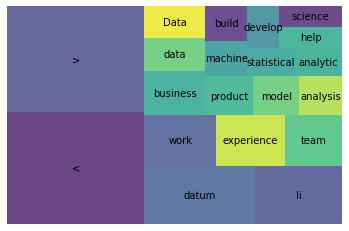

In [30]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [40]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df['clean_description']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,$,"$ 100,000",$ 300,+,+ city,+ year,+ years\xe2\x80\x99,.\n\nabout,.\n\nabout role\n\nas,.\n\nperks\n\nhealth,...,you\xe2\x80\x99ll partner,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99re ready,you\xe2\x80\x99ve,you\xe2\x80\x99ve work,yrs,|,||
0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.026609,0.0,0.029055,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.183957,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.135861,0.0,0.148350,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 